# Predicting the price of rare gem using Artificial Neural Network by Regression

## The Data

This data represents measurements of some rare gem stones, with 2 measurement features and a sale price [This data is fake] Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

## Load the Data

In [62]:
import pandas as pd

In [65]:
df = pd.read_csv('fake_reg.csv')

In [66]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


### Distribution plots of the features and price

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


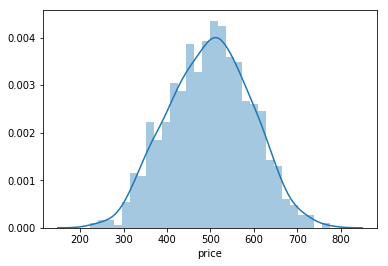

In [69]:
sns.distplot(df['price'],bins=30)

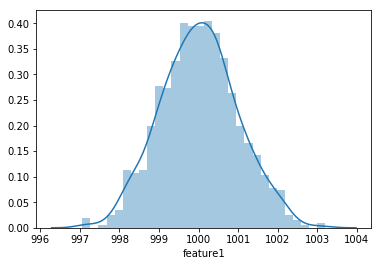

In [70]:
sns.distplot(df['feature1'],bins=30)

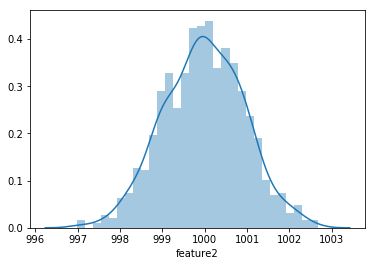

In [71]:
sns.distplot(df['feature2'],bins=30)

### Scatter Plot of all features and price

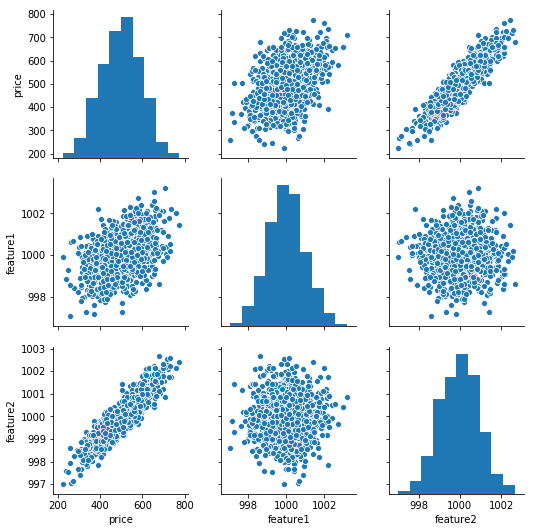

In [72]:
sns.pairplot(df)

### Regression on price and feature 2

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


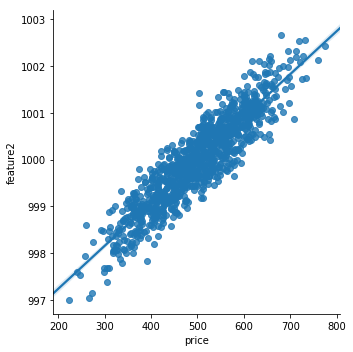

In [73]:
sns.lmplot(x='price',y='feature2',data=df)

In [74]:
# We can see clear correlation between the price of the gem and the feature number 2.

## Splitting the data into training and testing for ANN

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values #Independent variables

# Label
y = df['price'].values #Dependent variable (Target Variable)

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [77]:
X_train.shape

(700, 2)

In [78]:
X_test.shape

(300, 2)

In [79]:
y_train.shape

(700,)

In [80]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the features data before we can train the model with this Data

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [84]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [85]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [86]:
import tensorflow as tf

In [87]:
from tensorflow.keras.models import Sequential

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

Let's go ahead and build a simple model and then compile it by defining our solver

In [128]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

## Training the model

In [129]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 258987.2908
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 253994.0000
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 252028.9232
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 260853.6807
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 260340.2106
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 251450.7221
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 260375.0387
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 254397.4592
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254943.1800
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 249164.3213
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 252108.1060
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 1236.3373
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 1166.5207
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 1083.8071
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 1084.6957
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 1063.4816
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 1115.1712
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 940.6489
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 879.4994
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 892.6604
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 860.7742
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 772.1260
Epoch 108/250
22/22 [==============================] - 0s 2ms/step - loss: 822.5398
Ep

22/22 [==============================] - 0s 2ms/step - loss: 23.0071
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5318
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 25.7910
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 25.9924
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 26.3506
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3805
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 26.1608
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 23.7895
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 23.1125
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 23.8470
Epoch 205/250
22/22 [==============================] - 0s 1ms/step - loss: 23.8924
Epoch 206/250
22/22 [==============================] - 0s 1ms/step - loss: 22.9211
Epoch 207/250
22/2

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [130]:
model.history.history

{'loss': [256609.515625,
  256416.15625,
  256196.015625,
  255940.34375,
  255642.5625,
  255293.09375,
  254891.109375,
  254426.15625,
  253889.34375,
  253269.078125,
  252558.859375,
  251746.609375,
  250828.609375,
  249797.03125,
  248640.53125,
  247354.375,
  245928.296875,
  244357.1875,
  242627.90625,
  240731.390625,
  238658.5625,
  236401.96875,
  233959.15625,
  231324.015625,
  228482.125,
  225422.875,
  222140.796875,
  218610.5625,
  214888.25,
  210923.359375,
  206690.265625,
  202230.5625,
  197496.390625,
  192536.140625,
  187301.375,
  181834.046875,
  176104.453125,
  170118.6875,
  163927.609375,
  157485.34375,
  150834.21875,
  143960.015625,
  136912.203125,
  129679.5,
  122283.1171875,
  114707.015625,
  107036.984375,
  99313.3125,
  91517.0859375,
  83699.09375,
  75952.0546875,
  68308.125,
  60719.1328125,
  53303.0,
  46168.88671875,
  39322.00390625,
  32808.58203125,
  26787.556640625,
  21230.423828125,
  16260.169921875,
  11974.294921875,
  8

In [131]:
loss = model.history.history['loss']

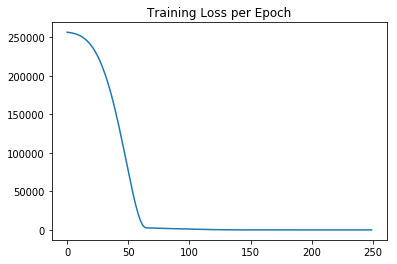

In [132]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on test set.


In [133]:
model.metrics_names

['loss']

In [134]:
test_score = model.evaluate(X_test,y_test,verbose=0)

In [135]:
test_score

26.81996726989746

## Further Evaluations

In [136]:
test_predictions = model.predict(X_test)

In [137]:
test_predictions

array([[406.26688],
       [625.0862 ],
       [593.5946 ],
       [573.643  ],
       [367.50076],
       [580.6113 ],
       [516.324  ],
       [460.22214],
       [550.6019 ],
       [448.6034 ],
       [613.3016 ],
       [550.28986],
       [420.11374],
       [409.85815],
       [652.85254],
       [438.3578 ],
       [509.6921 ],
       [661.5801 ],
       [664.23505],
       [566.92975],
       [335.02353],
       [445.91476],
       [383.44727],
       [379.66266],
       [567.9939 ],
       [612.1094 ],
       [533.7009 ],
       [428.89572],
       [657.0791 ],
       [415.07864],
       [443.70792],
       [486.31357],
       [439.47757],
       [683.55096],
       [425.7808 ],
       [418.69928],
       [503.14844],
       [551.83105],
       [510.9896 ],
       [396.3162 ],
       [620.1235 ],
       [417.63303],
       [605.94507],
       [447.03787],
       [503.21902],
       [583.1451 ],
       [670.6603 ],
       [491.59927],
       [319.3265 ],
       [486.61465],


In [138]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [139]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [140]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [141]:
test_predictions

0      406.266876
1      625.086182
2      593.594604
3      573.643005
4      367.500763
          ...    
295    530.348633
296    516.608765
297    611.161072
298    417.958801
299    411.870575
Length: 300, dtype: float32

In [142]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [143]:
pred_df.columns = ['Test Y','Model Predictions']

In [144]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.266876
1,624.156198,625.086182
2,582.455066,593.594604
3,578.588606,573.643005
4,371.224104,367.500763
...,...,...
295,525.704657,530.348633
296,502.909473,516.608765
297,612.727910,611.161072
298,417.569725,417.958801


Let's compare to the real test labels!

In [146]:
# Looks like are predictions were quite good compared to the y test results. The scatterplot between y test and our predictions is almost a straight line!

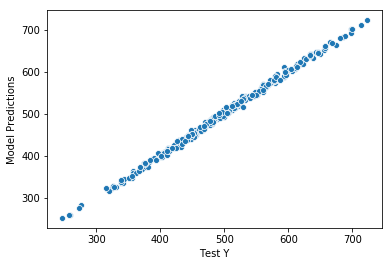

In [147]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

### Error

In [148]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

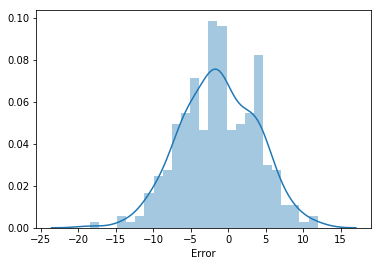

In [151]:
sns.distplot(pred_df['Error'],bins=25)

In [153]:
# We can see the normal behaviour of the error term

In [154]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [155]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.199385732623622

In [156]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

26.819986050736812

In [157]:
# Essentially the same thing, difference just due to precision (MSE)
test_score

26.81996726989746

In [158]:
#RMSE
test_score**0.5

5.178799790482102

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [163]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [164]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [165]:
new_gem = scaler.transform(new_gem)

In [166]:
model.predict(new_gem)

array([[420.70877]], dtype=float32)

In [169]:
# So the price of the new gem with the above given features is 420.708 